In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [37]:
full_data_Yerevan = pd.read_excel("cleaned_full_data.xlsx")

In [38]:
full_data_Yerevan.columns

Index(['city', 'country', 'district', 'host_since', 'host_response_rate',
       'host_identity_verified', 'review', 'superhost', 'property_type',
       'accomodates', 'number_bathroom', 'number_bedroom', 'number_beds',
       'price', 'cleanliness', 'accuracy', 'communication', 'location',
       'check_in', 'value'],
      dtype='object')

In [39]:
print("Duplicates: Yerevan", full_data_Yerevan.duplicated().sum()) 

Duplicates: Yerevan 185


In [40]:
print("Missing values: Yerevan", full_data_Yerevan.isna().sum().sum())

Missing values: Yerevan 0


In [41]:
full_data_Yerevan.host_since = 2023 - full_data_Yerevan.host_since

In [42]:
full_data_Yerevan.host_since 

0       4
1       1
2       4
3       1
4       8
       ..
1522    3
1523    1
1524    4
1525    8
1526    1
Name: host_since, Length: 1527, dtype: int64

In [43]:
categorical_label_encoder = LabelEncoder()
full_data_Yerevan["district"] = categorical_label_encoder.fit_transform(full_data_Yerevan["district"])
full_data_Yerevan["host_identity_verified"] = categorical_label_encoder.fit_transform(full_data_Yerevan["host_identity_verified"])
full_data_Yerevan["superhost"] = categorical_label_encoder.fit_transform(full_data_Yerevan["superhost"])
full_data_Yerevan["property_type"] = categorical_label_encoder.fit_transform(full_data_Yerevan["property_type"])

In [44]:
full_data_Yerevan = full_data_Yerevan.drop(['country'], axis = 1)
full_data_Yerevan = full_data_Yerevan.drop(['city'], axis = 1)
full_data_Yerevan = full_data_Yerevan.drop(['accomodates'], axis = 1)
full_data_Yerevan = full_data_Yerevan.drop(['number_bedroom'], axis = 1)
full_data_Yerevan = full_data_Yerevan.drop(['value'], axis = 1)
full_data_Yerevan = full_data_Yerevan.drop(['check_in'], axis = 1)
full_data_Yerevan = full_data_Yerevan.drop(['accuracy'], axis = 1)

In [45]:
X = full_data_Yerevan.drop(["superhost"], axis = 1)
y = full_data_Yerevan.superhost

In [46]:
cs = [0.000001 ,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [47]:
# train test split data 

X0, X1, Y0, Y1 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
logreg_cv = LogisticRegressionCV(Cs = cs, cv = 10, scoring = "accuracy", random_state = 58)

In [49]:
logreg_cv.fit(X0, Y0)
logreg_cv.score(X0, Y0)

0.6781326781326781

In [51]:
optimal_c = logreg_cv.C_
optimal_c = optimal_c[0]

print("Optimal C is:", optimal_c)
print("Corresponding accuracy is:", logreg_cv.score(X0, Y0))

Optimal C is: 100.0
Corresponding accuracy is: 0.6781326781326781


In [52]:
logreg_model = LogisticRegression(C = optimal_c)
logreg_model.fit(X0, Y0)
logreg_model_score = logreg_model.score(X0, Y0)


print("Logistic Regression  score:", logreg_model_score)

Logistic Regression  score: 0.628992628992629


In [53]:
logreg_pred = logreg_model.predict(X1)

print("Classification Report")
print(classification_report( Y1, logreg_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.84      0.70       167
           1       0.62      0.31      0.41       139

    accuracy                           0.60       306
   macro avg       0.61      0.58      0.56       306
weighted avg       0.61      0.60      0.57       306



### 0.59% of predicted regular hosts are actually regular, and 0.62% of predicted superhosts are actually superhosts

# KNN Classifier

In [56]:
k_value_list = np.arange(3,30) + 1
score_results_knn = []

for val in k_value_list:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn, X0, Y0, cv = kfold, scoring = "accuracy")
    score_results_knn.append(score)
    print("k val: %s, CV Score Avg: %s " % (val, np.mean(score)))

k val: 4, CV Score Avg: 0.8878115420498467 
k val: 5, CV Score Avg: 0.8820671731307478 
k val: 6, CV Score Avg: 0.866513394642143 
k val: 7, CV Score Avg: 0.8534053045448488 
k val: 8, CV Score Avg: 0.8353858456617355 
k val: 9, CV Score Avg: 0.8239304278288685 
k val: 10, CV Score Avg: 0.8116420098627216 
k val: 11, CV Score Avg: 0.8050846328135414 
k val: 12, CV Score Avg: 0.7944422231107557 
k val: 13, CV Score Avg: 0.8018192722910836 
k val: 14, CV Score Avg: 0.7936358789817406 
k val: 15, CV Score Avg: 0.7813341330134612 
k val: 16, CV Score Avg: 0.7567639610822339 
k val: 17, CV Score Avg: 0.7575703052112488 
k val: 18, CV Score Avg: 0.7559376249500198 
k val: 19, CV Score Avg: 0.760042649606824 
k val: 20, CV Score Avg: 0.7608556577369052 
k val: 21, CV Score Avg: 0.7608689857390378 
k val: 22, CV Score Avg: 0.7453018792483007 
k val: 23, CV Score Avg: 0.7510529121684659 
k val: 24, CV Score Avg: 0.7404038384646141 
k val: 25, CV Score Avg: 0.7469545515127283 
k val: 26, CV Scor

In [57]:
avg_cv_scores_knn = np.mean(np.array(score_results_knn), axis = 1)
max_avg_accuracy_index_knn = np.argmax(avg_cv_scores_knn) 

print("Optimal Value of k: %s" % k_value_list[max_avg_accuracy_index_knn]) 
print("Accuracy: %0.2f" % np.mean(score_results_knn[max_avg_accuracy_index_knn]))

Optimal Value of k: 4
Accuracy: 0.89


In [58]:
knn_optimal = KNeighborsClassifier(n_neighbors = k_value_list[max_avg_accuracy_index_knn])

knn_optimal.fit(X0, Y0)

train_score = knn_optimal.score(X0, Y0)
test_score = knn_optimal.score(X1,Y1 )

print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.9475839475839476
Test score: 0.8954248366013072


# RandomForestClassifier

In [60]:
max_depth_param_list = np.arange(2, 25)
score_results_rf = []

for depth in max_depth_param_list:
    rf_reg = RandomForestClassifier(max_depth = depth, max_features = 3, n_estimators = 8)
    kfold = KFold(n_splits=15)
    score = cross_val_score(rf_reg, X0, Y0, cv = kfold) # default scoring is R^2
    score_results_rf.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.7288868814614073 
max_depth val: 3, CV Score Avg: 0.7642677908260563 
max_depth val: 4, CV Score Avg: 0.8092140921409214 
max_depth val: 5, CV Score Avg: 0.8296898524540801 
max_depth val: 6, CV Score Avg: 0.8664960353307237 
max_depth val: 7, CV Score Avg: 0.891920104386229 
max_depth val: 8, CV Score Avg: 0.9083107497741645 
max_depth val: 9, CV Score Avg: 0.9295392953929539 
max_depth val: 10, CV Score Avg: 0.9278932048579744 
max_depth val: 11, CV Score Avg: 0.9418046773060322 
max_depth val: 12, CV Score Avg: 0.9574425373883368 
max_depth val: 13, CV Score Avg: 0.960764829870521 
max_depth val: 14, CV Score Avg: 0.9672789320485797 
max_depth val: 15, CV Score Avg: 0.9648499447957443 
max_depth val: 16, CV Score Avg: 0.9631536685737228 
max_depth val: 17, CV Score Avg: 0.9631436314363143 
max_depth val: 18, CV Score Avg: 0.9664358125062733 
max_depth val: 19, CV Score Avg: 0.9705309645689049 
max_depth val: 20, CV Score Avg: 0.9722272407909264 
max

In [61]:
rf_avg_cv_scores = np.mean(np.array(score_results_rf), axis = 1)
rf_max_avg_accuracy_index = np.argmax(rf_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[rf_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 23


In [62]:
mod_rf_reg = RandomForestClassifier(max_depth = max_depth_param_list[rf_max_avg_accuracy_index], oob_score = True)
mod_rf_reg_fit = mod_rf_reg.fit(X0, Y0)
model_rf_score = mod_rf_reg_fit.score(X1,Y1)
print("Model Score on test set: %s" % model_rf_score)

Model Score on test set: 0.9640522875816994


In [64]:
import numpy as np
 
importances = mod_rf_reg_fit.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X1.columns[0:]
 
for f in range(X1.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1) review                         0.275905
 2) price                          0.124825
 3) cleanliness                    0.107037
 4) host_since                     0.101215
 5) property_type                  0.099692
 6) location                       0.083567
 7) communication                  0.057366
 8) number_beds                    0.051437
 9) host_response_rate             0.040903
10) number_bathroom                0.028984
11) district                       0.026121
12) host_identity_verified         0.002948


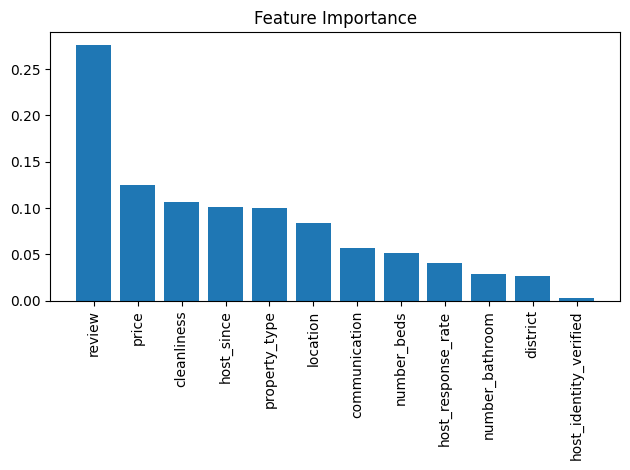

In [65]:
plt.title('Feature Importance')
plt.bar(range(X1.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X1.shape[1]), X1.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Decision tree classifier

In [68]:
from sklearn import tree
max_depth_param_list = np.arange(2, 8)
score_results_dt = []

for depth in max_depth_param_list:
    dt_reg = tree.DecisionTreeClassifier(max_depth = depth)
    kfold = KFold(n_splits=10)
    score = cross_val_score(dt_reg,X0, Y0, cv = kfold) # default scoring is R^2
    score_results_dt.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.6895841663334665 
max_depth val: 3, CV Score Avg: 0.748580567772891 
max_depth val: 4, CV Score Avg: 0.7526722644275624 
max_depth val: 5, CV Score Avg: 0.7526522724243636 
max_depth val: 6, CV Score Avg: 0.8198320671731307 
max_depth val: 7, CV Score Avg: 0.8509596161535387 


In [69]:
dt_avg_cv_scores = np.mean(np.array(score_results_dt), axis = 1)
dt_max_avg_accuracy_index = np.argmax(dt_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[dt_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 7


In [70]:
mod_dt_reg = tree.DecisionTreeClassifier(max_depth = max_depth_param_list[dt_max_avg_accuracy_index])
mod_dt_reg_fit = mod_dt_reg.fit(X0, Y0)
model_dt_score = mod_dt_reg_fit.score(X1,Y1)
print("Model Score on test set: %s" % model_dt_score)

Model Score on test set: 0.8300653594771242


#  Gradient Boosting Classifier

In [71]:
max_depth_param_list = np.arange(2, 12)
score_results_gb = []

for depth in max_depth_param_list:
    gb_reg = GradientBoostingClassifier(max_depth = depth)
    kfold = KFold(n_splits=10)
    score = cross_val_score(gb_reg, X0, Y0, cv = 10) # default scoring is R^2
    score_results_gb.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.859156337465014 
max_depth val: 3, CV Score Avg: 0.9222111155537785 
max_depth val: 4, CV Score Avg: 0.956604025056644 
max_depth val: 5, CV Score Avg: 0.9738104758096761 
max_depth val: 6, CV Score Avg: 0.9787018525922964 
max_depth val: 7, CV Score Avg: 0.9778755164600825 
max_depth val: 8, CV Score Avg: 0.9803411968545914 
max_depth val: 9, CV Score Avg: 0.9770491803278688 
max_depth val: 10, CV Score Avg: 0.9762295081967214 
max_depth val: 11, CV Score Avg: 0.9697054511528721 


In [72]:
gb_avg_cv_scores = np.mean(np.array(score_results_gb), axis = 1)
gb_max_avg_accuracy_index = np.argmax(gb_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[gb_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 8


In [73]:
mod_gb_reg = GradientBoostingClassifier(max_depth = max_depth_param_list[gb_max_avg_accuracy_index])
mod_gb_reg_fit = mod_gb_reg.fit(X0, Y0)
model_gb_score = mod_gb_reg_fit.score(X1,Y1)
print("Model Score on test set: %s" % model_gb_score)

Model Score on test set: 0.9673202614379085


In [74]:
import numpy as np
 
importances = mod_gb_reg_fit.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X0.columns[0:]
 
for f in range(X0.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1) review                         0.419831
 2) cleanliness                    0.112468
 3) price                          0.105901
 4) host_since                     0.101416
 5) property_type                  0.072456
 6) location                       0.059318
 7) host_response_rate             0.049156
 8) communication                  0.038593
 9) number_beds                    0.028236
10) number_bathroom                0.007622
11) district                       0.004681
12) host_identity_verified         0.000322


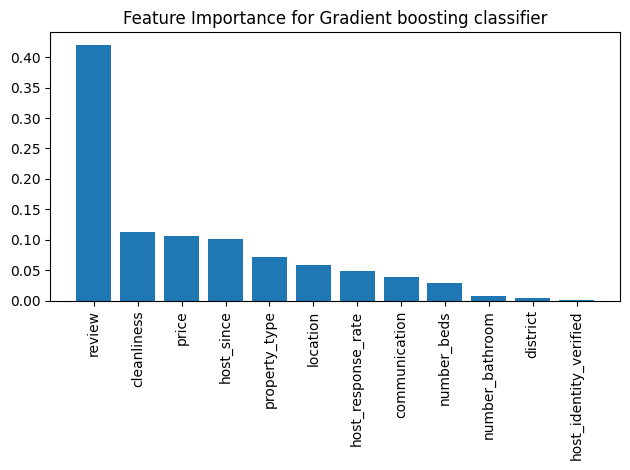

In [76]:
plt.title('Feature Importance for Gradient boosting classifier')
plt.bar(range(X0.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X0.shape[1]), X0.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Ada Boost Classifier

In [77]:
max_depth_param_list = np.arange(2, 22)
score_results_ab = []

for depth in max_depth_param_list:
    ab_reg = AdaBoostClassifier(tree.DecisionTreeClassifier(
        max_depth = depth), n_estimators = 500, learning_rate = 1)
    kfold = KFold(n_splits=10)
    score = cross_val_score(ab_reg, X0, Y0, cv = kfold) # default scoring is R^2
    score_results_ab.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.9803478608556577 
max_depth val: 3, CV Score Avg: 0.9795281887245102 
max_depth val: 4, CV Score Avg: 0.9762428361988537 
max_depth val: 5, CV Score Avg: 0.9770691723310676 
max_depth val: 6, CV Score Avg: 0.9754298280687724 
max_depth val: 7, CV Score Avg: 0.9754298280687724 
max_depth val: 8, CV Score Avg: 0.9762495001999199 
max_depth val: 9, CV Score Avg: 0.9778888444622151 
max_depth val: 10, CV Score Avg: 0.9770491803278688 
max_depth val: 11, CV Score Avg: 0.9713181394109023 
max_depth val: 12, CV Score Avg: 0.961515393842463 
max_depth val: 13, CV Score Avg: 0.9639677462348393 
max_depth val: 14, CV Score Avg: 0.961515393842463 
max_depth val: 15, CV Score Avg: 0.9582300413168066 
max_depth val: 16, CV Score Avg: 0.9598693855791016 
max_depth val: 17, CV Score Avg: 0.9598760495801679 
max_depth val: 18, CV Score Avg: 0.959856057576969 
max_depth val: 19, CV Score Avg: 0.959043049446888 
max_depth val: 20, CV Score Avg: 0.9615087298413967 
max_d

In [78]:
ab_avg_cv_scores = np.mean(np.array(score_results_ab), axis = 1)
ab_max_avg_accuracy_index = np.argmax(ab_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[ab_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 2


In [79]:
mod_ab_reg = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = max_depth_param_list[
ab_max_avg_accuracy_index]), n_estimators = 400, learning_rate = 1)
mod_ab_reg_fit = mod_ab_reg.fit(X0, Y0)
model_ab_score = mod_ab_reg_fit.score(X1,Y1)
print("Model Score on test set: %s" % model_ab_score)

Model Score on test set: 0.9673202614379085


In [80]:
import numpy as np
 
importances = mod_ab_reg_fit.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X0.columns[0:]
 
for f in range(X0.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1) review                         0.271594
 2) price                          0.181599
 3) host_since                     0.124127
 4) location                       0.101900
 5) cleanliness                    0.088210
 6) property_type                  0.063528
 7) number_beds                    0.054602
 8) communication                  0.042105
 9) number_bathroom                0.030254
10) district                       0.025519
11) host_response_rate             0.015341
12) host_identity_verified         0.001220


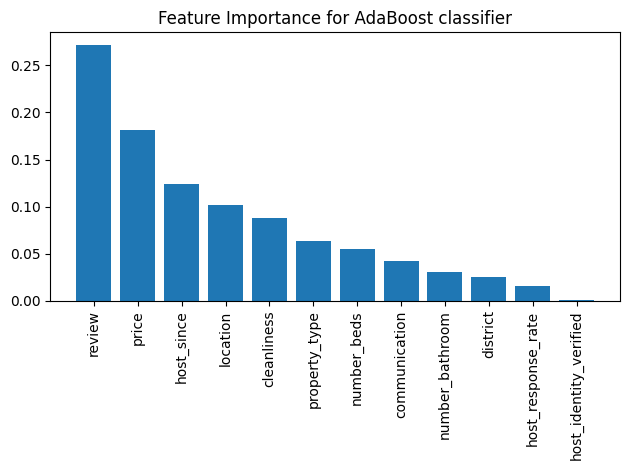

In [81]:
plt.title('Feature Importance for AdaBoost classifier')
plt.bar(range(X0.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X0.shape[1]), X0.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()